In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [3]:
import pandas as pd
import pyproj

In [4]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
from pathlib import Path

In [6]:
import joblib

In [7]:
from mt_function_yl import *

In [8]:
import seaborn as sn

### Data loading

In [9]:
# Curb extraction data
predc_a = pd.read_csv('/home/yelhe/script/mt/output/predcurb_accident_count_sum.csv')

In [10]:
predc_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      295 non-null    int64  
 1   sum     295 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.7 KB


In [11]:
# Entropy
# iema = pd.read_csv('/home/yelhe/script/mt/output/accident_image_entropy_mean.csv')
# mewa = pd.read_csv('/home/yelhe/script/mt/output/accident_mask_entropy_wholescene_mean.csv')
# mega = pd.read_csv('/home/yelhe/script/mt/output/accident_mask_entropy_groundscene_mean.csv')

dfen_a = pd.read_csv('/home/yelhe/script/mt/output/accident_entropy_sum.csv')

In [12]:
dfen_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1170 non-null   int64  
 1   dir     1170 non-null   int64  
 2   Nr      1170 non-null   int64  
 3   mew     1170 non-null   float64
 4   meg     1170 non-null   float64
 5   ie      1170 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 55.0 KB


In [13]:
dfenm = dfen_a.groupby('id', as_index = True)[['mew','meg','ie']].mean()


In [14]:
dfenm = dfenm.reset_index()

In [15]:
dfc = pd.merge(dfenm, predc_a, on = ['id'])

In [18]:
dfc.rename(columns = {'sum':'cn'}, inplace = True)

In [19]:
dfc

,id,mew,meg,ie,cn
0,99900044963840,0.974222,0.707870,4.610898,0.0
1,99900045510756,1.202524,1.230196,4.675890,0.0
2,99900045511204,1.302862,1.501371,4.245212,2.0
3,99900045729553,1.060837,0.552166,4.631253,0.0
4,99900045992823,1.288913,1.251356,4.673955,1.0
...,...,...,...,...,...
290,99900063695545,1.228531,1.118886,4.546712,0.0
291,99900063698497,1.401721,1.118604,4.730341,1.0
292,99900063992212,1.161785,0.963180,4.519516,2.0
293,99900064009149,1.447296,1.260958,4.329542,0.0


In [20]:
dfenmin = dfen_a.groupby('id', as_index = True)[['mew','meg','ie']].min()
dfenmin.rename(columns = {'mew':'mewmin', 'meg':'megmin', 'ie':'iemin'}, inplace = True)

In [21]:
dfenmin = dfenmin.reset_index()

In [22]:
dfenmax = dfen_a.groupby('id', as_index = True)[['mew','meg','ie']].max()
dfenmax.rename(columns = {'mew':'mewmax', 'meg':'megmax', 'ie':'iemax'}, inplace = True)
dfenmax = dfenmax.reset_index()

In [23]:
dfen_all = pd.merge(dfenmin, dfenmax, on = ['id'])

In [24]:
dfenc_all = pd.merge(dfen_all, dfc, on = ['id'])

In [25]:
# CP: curb presence (0 no, 1 exist)
dfenc_all = dfenc_all.assign(cp = 1)

In [26]:
dfenc_all.loc[dfenc_all['cn'] == 0, 'cp'] = 0

In [27]:
dfenc_all

,id,mewmin,megmin,iemin,mewmax,megmax,iemax,mew,meg,ie,cn,cp
0,99900044963840,0.919914,0.000000,4.518572,1.090977,1.098612,4.779405,0.974222,0.707870,4.610898,0.0,0
1,99900045510756,0.999722,1.098612,4.622283,1.315707,1.366711,4.722890,1.202524,1.230196,4.675890,0.0,0
2,99900045511204,1.181150,1.039721,4.176222,1.454264,1.720193,4.389287,1.302862,1.501371,4.245212,2.0,1
3,99900045729553,0.855960,0.000000,4.528002,1.267993,1.153742,4.741170,1.060837,0.552166,4.631253,0.0,0
4,99900045992823,1.005629,1.011404,4.545034,1.522175,1.332179,4.761103,1.288913,1.251356,4.673955,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
290,99900063695545,1.054588,0.950271,4.469531,1.575088,1.279854,4.662620,1.228531,1.118886,4.546712,0.0,0
291,99900063698497,1.257593,0.636514,4.687883,1.540987,1.470808,4.761851,1.401721,1.118604,4.730341,1.0,1
292,99900063992212,0.780158,0.000000,4.416337,1.395134,1.468140,4.633394,1.161785,0.963180,4.519516,2.0,1
293,99900064009149,1.392122,0.955700,4.242503,1.474737,1.735126,4.368505,1.447296,1.260958,4.329542,0.0,0


In [114]:
# Curb related variables including entropy
# dfenc_all.to_csv('/home/yelhe/script/mt/output/accident_crev.csv', index = False)

In [28]:
df_raw = pd.read_excel('/home/yelhe/data/Acc/E_Trottis_Unfallbericht_2019-2022.xlsx',sheet_name=None)

In [29]:
dfse = df_raw['Allgemeine Angaben']

In [30]:
se = dfse[['Unfall-Nr.', 'G*', 'SV*', 'LV*', 'Sach-\nschaden**']]

In [31]:
se.rename(columns = {'Unfall-Nr.': 'Nr', 'G*':'G', 'SV*':'SV','LV*':'LV','Sach-\nschaden**':'PD',}, inplace = True)

/sctmp/yelhe/ipykernel_3910714/902077865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se.rename(columns = {'Unfall-Nr.': 'Nr', 'G*':'G', 'SV*':'SV','LV*':'LV','Sach-\nschaden**':'PD',}, inplace = True)


In [32]:
se.rename(columns = {'Nr':'id'}, inplace = True)

/sctmp/yelhe/ipykernel_3910714/3024162487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se.rename(columns = {'Nr':'id'}, inplace = True)


In [33]:
# Regression curb
dfrc = pd.merge(se, dfenc_all, on = ['id'])

In [34]:
# severity-property, property damage
dfrc.rename(columns = {'PD':'pd'}, inplace = True)

In [35]:
# severity-person 
# G:10, SV:5, LV:1
# dfrc['sp'] = dfrc['G']*10 + dfrc['SV'] *5 + dfrc['LV']*1

# Might be sensitive to the weight settin so drop

In [37]:
dfrc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      295 non-null    int64  
 1   G       295 non-null    int64  
 2   SV      295 non-null    int64  
 3   LV      295 non-null    int64  
 4   pd      295 non-null    int64  
 5   mewmin  295 non-null    float64
 6   megmin  295 non-null    float64
 7   iemin   295 non-null    float64
 8   mewmax  295 non-null    float64
 9   megmax  295 non-null    float64
 10  iemax   295 non-null    float64
 11  mew     295 non-null    float64
 12  meg     295 non-null    float64
 13  ie      295 non-null    float64
 14  cn      295 non-null    float64
 15  cp      295 non-null    int64  
dtypes: float64(10), int64(6)
memory usage: 37.0 KB


#### Preparation for regression model

##### Distribution check

In [39]:
import statsmodels.api as sm

(array([ 2.,  0., 10.,  9., 25., 43., 84., 80., 38.,  4.]),
 array([0.69789472, 0.805918  , 0.91394129, 1.02196457, 1.12998786,
        1.23801115, 1.34603443, 1.45405772, 1.562081  , 1.67010429,
        1.77812757]),
 <BarContainer object of 10 artists>)

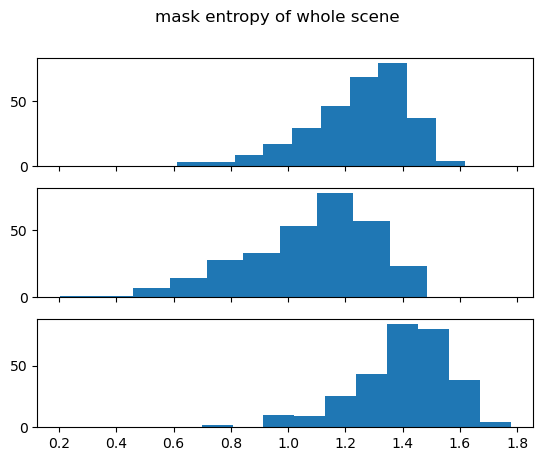

In [40]:
fig, axs = plt.subplots(3, sharex = True)
fig.suptitle('mask entropy of whole scene')
axs[0].hist(dfrc['mew'])
axs[1].hist(dfrc['mewmin'])
axs[2].hist(dfrc['mewmax'])

(array([  2.,   0.,   0.,   7.,   1.,  14.,  35.,  91., 108.,  37.]),
 array([0.        , 0.17650573, 0.35301145, 0.52951718, 0.7060229 ,
        0.88252863, 1.05903435, 1.23554008, 1.4120458 , 1.58855153,
        1.76505725]),
 <BarContainer object of 10 artists>)

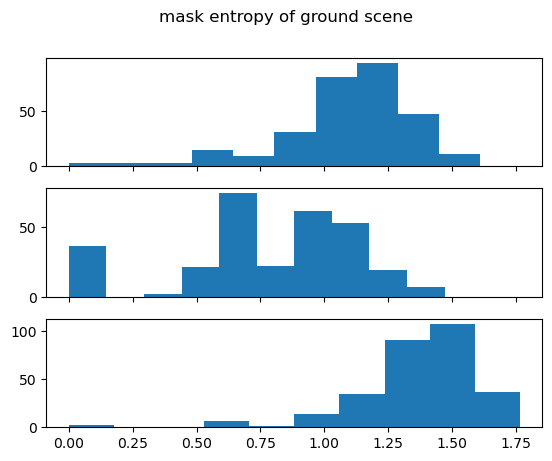

In [41]:
fig, axs = plt.subplots(3, sharex = True)
fig.suptitle('mask entropy of ground scene')
axs[0].hist(dfrc['meg'])
axs[1].hist(dfrc['megmin'])
axs[2].hist(dfrc['megmax'])

(array([ 2.,  0.,  6.,  4., 14., 29., 37., 33., 91., 79.]),
 array([3.90719082, 4.00019696, 4.0932031 , 4.18620924, 4.27921537,
        4.37222151, 4.46522765, 4.55823379, 4.65123993, 4.74424606,
        4.8372522 ]),
 <BarContainer object of 10 artists>)

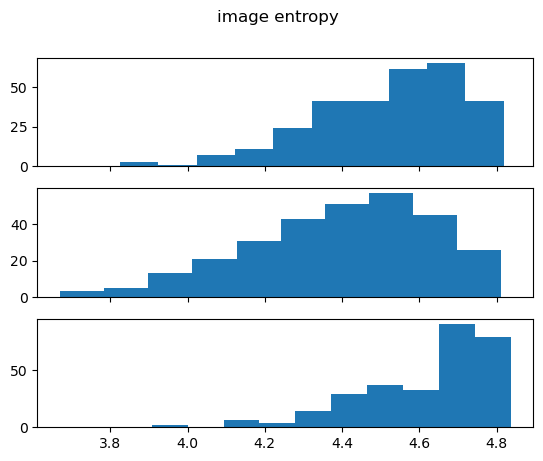

In [42]:
fig, axs = plt.subplots(3, sharex = True)
fig.suptitle('image entropy')
axs[0].hist(dfrc['ie'])
axs[1].hist(dfrc['iemin'])
axs[2].hist(dfrc['iemax'])

(array([145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 150.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

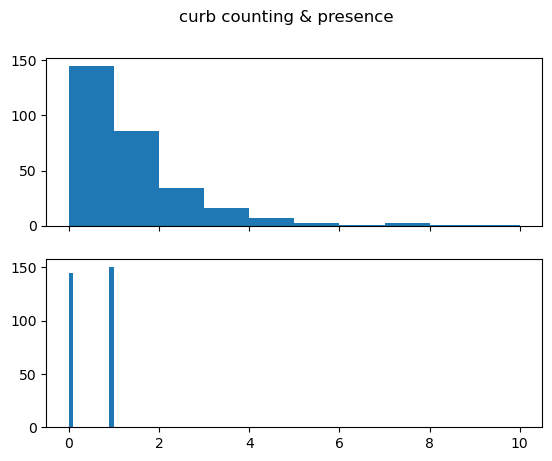

In [43]:
fig, axs = plt.subplots(2, sharex = True)
fig.suptitle('curb counting & presence')
axs[0].hist(dfrc['cn'])
axs[1].hist(dfrc['cp'])

##### Normal distribution test

In [44]:
from scipy import stats

In [45]:
# pip install tabulate

In [46]:
from tabulate import tabulate

In [47]:
res_mew = stats.normaltest(dfrc['mew'])
res_mewmin = stats.normaltest(dfrc['mewmin'])
res_mewmax = stats.normaltest(dfrc['mewmax'])
res_meg = stats.normaltest(dfrc['meg'])
res_megmin = stats.normaltest(dfrc['megmin'])
res_megmax = stats.normaltest(dfrc['megmax'])
res_ie = stats.normaltest(dfrc['ie'])
res_iemin = stats.normaltest(dfrc['iemin'])
res_iemax = stats.normaltest(dfrc['iemax'])
res_cn = stats.normaltest(dfrc['cn'])

In [50]:
nt = [['','mew', 'meg', 'ie', 'cn'],
      ['var', res_mew.pvalue, res_meg.pvalue, res_ie.pvalue, res_cn.pvalue],
      ['min', res_mewmin.pvalue, res_megmin.pvalue, res_iemin.pvalue, ''],
      ['max', res_mewmax.pvalue, res_megmax.pvalue, res_iemax.pvalue, '']]

In [51]:
print(tabulate(nt))

---  ----------------------  ----------------------  ----------------------  ---------------------
     mew                     meg                     ie                      cn
var  4.40727951207253e-09    9.085136206442949e-20   1.2845308127903771e-07  2.243297732859301e-42
min  2.0773249104189035e-06  1.7123063677699816e-06  0.0015720596740620998
max  2.1456165459478802e-11  7.321700186197608e-29   1.049612113000862e-14
---  ----------------------  ----------------------  ----------------------  ---------------------


In [136]:
nd = np.random.normal(0, 0.1, 100000)

In [137]:
res_nd = stats.normaltest(nd)

In [138]:
res_nd.statistic

0.14333955302240686

In [139]:
res_nd.pvalue

0.930838229711697

#### Regression analysis

In [78]:
# result_sp = sm.OLS(formula='sp ~ mew + meg + ie + cn', data=dfrc).fit()
Y = dfrc['sp']
X = dfrc[['mew','meg','ie','cn']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X)
result1 = model1.fit()
result1.params

const    3.006348
mew     -1.378461
meg      0.464645
ie      -0.039340
cn      -0.017868
dtype: float64

In [79]:
result1.tvalues

const    1.278016
mew     -2.155572
meg      1.093304
ie      -0.078663
cn      -0.242419
dtype: float64

In [84]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sp   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.297
Date:                Thu, 07 Mar 2024   Prob (F-statistic):              0.271
Time:                        13:28:21   Log-Likelihood:                -560.59
No. Observations:                 295   AIC:                             1131.
Df Residuals:                     290   BIC:                             1150.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0063      2.352      1.278      0.202      -1.624       7.636
mew           -1.3785      0.639     -2.156      0.032      -2.637      -0.120
meg            0.4646      0.425      1.093      0.275      -0.372       1.301
ie            -0.0393      0.500     -0.079      0.937      -1.024       0.945
cn            -0.0179      0.074     -0.242      0.809      -0.163       0.127
==============================================================================
Omnibus:                       73.775   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.847
Skew:                           1.520   Prob(JB):                     1.28e-27
Kurtosis:                       3.914   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# result_sp = sm.OLS(formula='sp ~ mew + meg + ie + cn', data=dfrc).fit()
Y2 = dfrc['pd']
X2 = dfrc[['mew','meg','ie','cn']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2, X2)
result2 = model2.fit()
result2.params

const    8775.819709
mew       292.416884
meg       579.330298
ie      -1905.199714
cn       -124.232695
dtype: float64

In [86]:
result2.tvalues

const    1.775085
mew      0.217573
meg      0.648606
ie      -1.812638
cn      -0.801993
dtype: float64

In [87]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pd   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.120
Date:                Thu, 07 Mar 2024   Prob (F-statistic):              0.347
Time:                        13:31:50   Log-Likelihood:                -2817.5
No. Observations:                 295   AIC:                             5645.
Df Residuals:                     290   BIC:                             5663.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8775.8197   4943.887      1.775      0.077    -954.630    1.85e+04
mew          292.4169   1343.995      0.218      0.828   -2352.805    2937.638
meg          579.3303    893.193      0.649      0.517   -1178.633    2337.293
ie         -1905.1997   1051.064     -1.813      0.071   -3973.882     163.482
cn          -124.2327    154.905     -0.802      0.423    -429.113     180.648
==============================================================================
Omnibus:                      556.733   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           320937.334
Skew:                          11.247   Prob(JB):                         0.00
Kurtosis:                     163.013   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

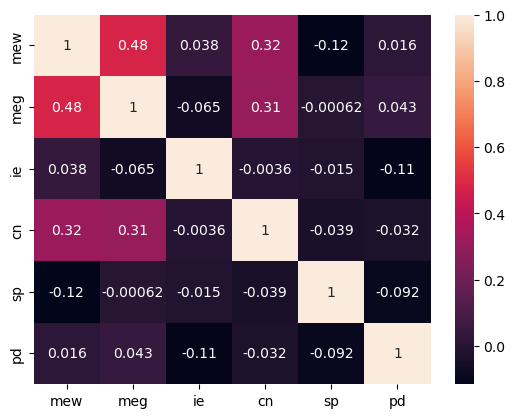

In [88]:
# vc
vc = dfrc[['mew', 'meg', 'ie', 'cn', 'sp', 'pd']]
corr_matrix = vc.corr()
sn.heatmap(corr_matrix, annot = True)
plt.show()

In [90]:
Y3 = dfrc['sp']
X3 = dfrc['mew']
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3, X3)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sp   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.981
Date:                Thu, 07 Mar 2024   Prob (F-statistic):             0.0469
Time:                        13:44:11   Log-Likelihood:                -561.22
No. Observations:                 295   AIC:                             1126.
Df Residuals:                     293   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9600      0.685      4.322      0.000       1.612       4.308
mew           -1.0892      0.546     -1.995      0.047      -2.164      -0.015
==============================================================================
Omnibus:                       73.700   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.717
Skew:                           1.522   Prob(JB):                     1.37e-27
Kurtosis:                       3.891   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""